In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
import numpy as np
import pandas as pd
from skimage import measure
from scipy.misc import imread
from skimage import io, color, img_as_ubyte
from sklearn.manifold import TSNE

In [24]:
import os
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import skimage
import numpy as np
from skimage import measure
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

In [155]:

prename = 'file26-outputs(PSNR: 20.745203 and SSIM: 0.61848456).jpg'
tlname = 'file26-outputs(PSNR: 25.553387 and SSIM: 0.7984693).jpg'
srname = 'file26-targets.jpg'
asrname = 'file26-outputs(PSNR: 25.402475 and SSIM: 0.82692957).jpg'
aganname = 'file26-targets.jpg'
targetname = 'file26-targets.jpg'

final = '/Users/hpathak/Documents/final/'

pre = Image.open('/Users/hpathak/Documents/tl_as/SRGAN_pre_gimg2/images/'+prename)
tl = Image.open('/Users/hpathak/Documents/tl_as/SRGAN_MSE_gimg2/images/' + tlname)
sr = Image.open('/Users/hpathak/Documents/tl_as/SRGAN_MSE_gimg2/images/'+ srname)
asr = Image.open('/Users/hpathak/Documents/tl_as/ASRResnet_gimg2/images/' + asrname)
agan = Image.open('/Users/hpathak/Documents/tl_as/SRGAN_MSE_gimg2/images/' + aganname)
target = Image.open('/Users/hpathak/Documents/tl_as/ASRResnet_gimg2/images/'+ targetname) 

In [156]:
a,b,c,d = 900,400,1200,700

In [157]:
#target rectangle
target_ = target
draw = ImageDraw.Draw(target_)
draw.rectangle([(a,b),(c,d)] , outline='black')
target.save(final+'rectangle.jpg')

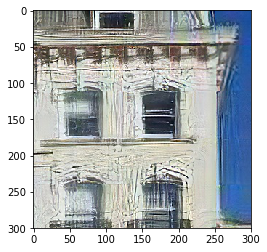

In [158]:
# crop pretrained
pre = np.asarray(pre)
pre = pre[b:d , a:c]
plt.figure()
plt.imshow(pre)


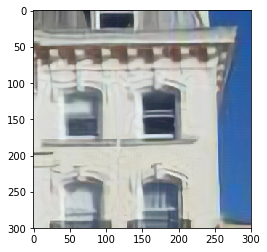

In [159]:
# crop TL

tl = np.asarray(tl)
tl = tl[b:d , a:c]
plt.figure()
plt.imshow(tl)

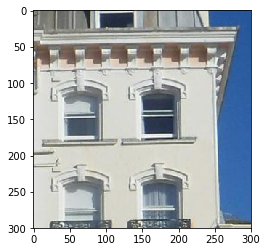

In [160]:
# crop SRGAN

sr = np.asarray(sr)
sr = sr[b:d , a:c]
plt.figure()
plt.imshow(sr)

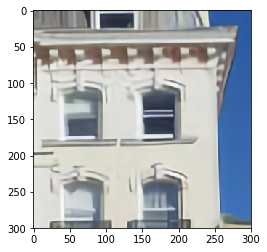

In [161]:
# crop ASRResnet 

asr = np.asarray(asr)
asr = asr[b:d , a:c]
plt.figure()
plt.imshow(asr)

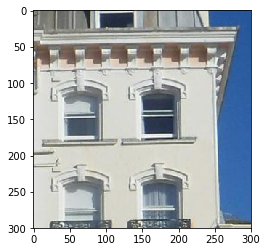

In [162]:
# crop AGANSR

agan = np.asarray(agan)
agan = agan[b:d , a:c]
plt.figure()
plt.imshow(agan)

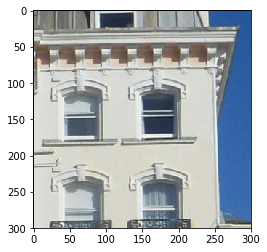

In [163]:
# crop target

target = np.asarray(target)
target = target[b:d , a:c]
plt.figure()
plt.imshow(target)

In [164]:
pretemp = prename.split('(')[-1]
prepsnr = pretemp.split(')')[0]
print(prepsnr)

tltemp = tlname.split('(')[-1]
tlpsnr = tltemp.split(')')[0]
print(tlpsnr)

srtemp = srname.split('(')[-1]
srpsnr = srtemp.split(')')[0]
print(srpsnr)

asrtemp = asrname.split('(')[-1]
asrpsnr = asrtemp.split(')')[0]
print(asrpsnr)

agantemp = aganname.split('(')[-1]
aganpsnr = agantemp.split(')')[0]
print(aganpsnr)

PSNR: 20.745203 and SSIM: 0.61848456
PSNR: 25.553387 and SSIM: 0.7984693
file26-targets.jpg
PSNR: 25.402475 and SSIM: 0.82692957
file26-targets.jpg


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U9') dtype('<U9') dtype('<U9')

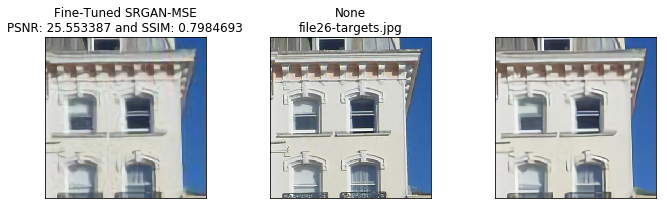

In [171]:
x = np.linspace(0, 3.14)
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
d = {1:'Fine-Tuned SRGAN-MSE', 3: 'SRResNet', 4: 'ASRResNet', 5: 'Target' }
images = {1:tl, 2: sr, 3:asr,  4: target }
psnr = { 1:tlpsnr, 2: srpsnr, 3:asr,4: '' }
for i in range(1, 5):
    ax = fig.add_subplot(1, 4, i)
    ax.imshow(images.get(i))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(d.get(i)) + '\n' +  psnr.get(i))
    
fig.savefig(final+'crops26.jpg')